# Acerca del conjunto de datos

El conjunto de datos de este modelo proviene del repositorio “UCI Machine Learning”. Estos datos se recopilaron en in 1978, y cada una de las 506 entradas representan datos agregados de 14 características de casas en diversos barrios de Boston.

Las características son:

* CRIM: Índice de criminalidad per capita
* ZN: Proporción de superficie residencial establecida en lotes mayores de 25.000 sq.ft (equivalente a 2.223 metros cuadrados).
* INDUS: Proporción de superficie de negocio no minorista.
* CHAS: Es la variable ficticia “río Charles” (igual a 1 si el tramo considerado está en la ribera del río, 0 en el otro caso)
* NOX: Concentración de óxidos de nitrógeno (partes por 10 millones)
* RM: Número promedio de habitaciones por vivienda
* AGE: Proporción de viviendas en propiedad ocupadas, construidas antes de 1940
* DIS: Distancias ponderadas a cinco centros de empleo de Boston
* RAD: Índice de accesibilidad a las autopistas radiales
* PTRATIO - proporción alumnos-profesor por ciudad
* B - 1000(Bk - 0,63)^2 donde Bk es la proporción de personas de color por ciudad
* LSTAT - % de la población con un estatus inferior
* MEDV - Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.

La variable nº 14 parece estar censurada en 50.00 (correspondiente a un precio medio de \$50,000); la censura viene sugerida por el hecho de que el precio medio más alto de exactamente \$50,000  se registra en 16 casos, mientras que 15 casos tienen precios entre \$40,000 y \$50,000

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score as cvs

In [3]:
#importing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/housing.csv', delimiter=r'\s+', names=column_names)

In [4]:
#Las 5 primeras filas del conjunto de datos
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [133]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [134]:
#Forma del conjunto de datos (rows, columns)
dataset.shape

(506, 14)

## Análisis estadístico del Dataset

In [5]:

#describir el Dataset para ver la distribución de los datos
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


De la distribución anterior podemos ver que:
1.   La variable 'ZN' es 0 para los percentiles 25 y 50 que resultarán en datos sesgados Esto se debe a que "ZN" es una variable condicional.
2.   También para la variable 'CHAS' es 0 para los percentiles 25, 50 y 75 que también nos mostrará que los datos son altamente sesgados. Esto se debe a que "CHAS" es un dato categórico, que contiene sólo las variables 0 y 1.

Otro dato importante que podemos deducir de la descripción anterior es que el valor máximo de "MEDV", que es 50, coincide con la descripción original de los datos, que dice : La variable nº 14 parece estar censurada en 50,00 (correspondiente a un precio medio de $50,000)

Para empezar, podemos suponer que las variables "ZN" y "CHAS" pueden no ser útiles para predecir el MEDV, ya que darían lugar a un modelo sesgado, por lo que vamos a eliminarlas.Para empezar, podemos suponer que las variables "ZN" y "CHAS" pueden no ser útiles para predecir el MEDV, ya que darían lugar a un modelo sesgado, por lo que vamos a eliminarlas.

In [6]:
# Eliminación de las variables "ZN" y "CHAS" de los datos del formulario
dataset = dataset.drop(['ZN', 'CHAS'], axis=1)
dataset.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Verificar valores nulos

In [137]:
dataset.isnull().sum()

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no null values in our dataset

# Comprobación y tratamiento de valores atípicos en los datos





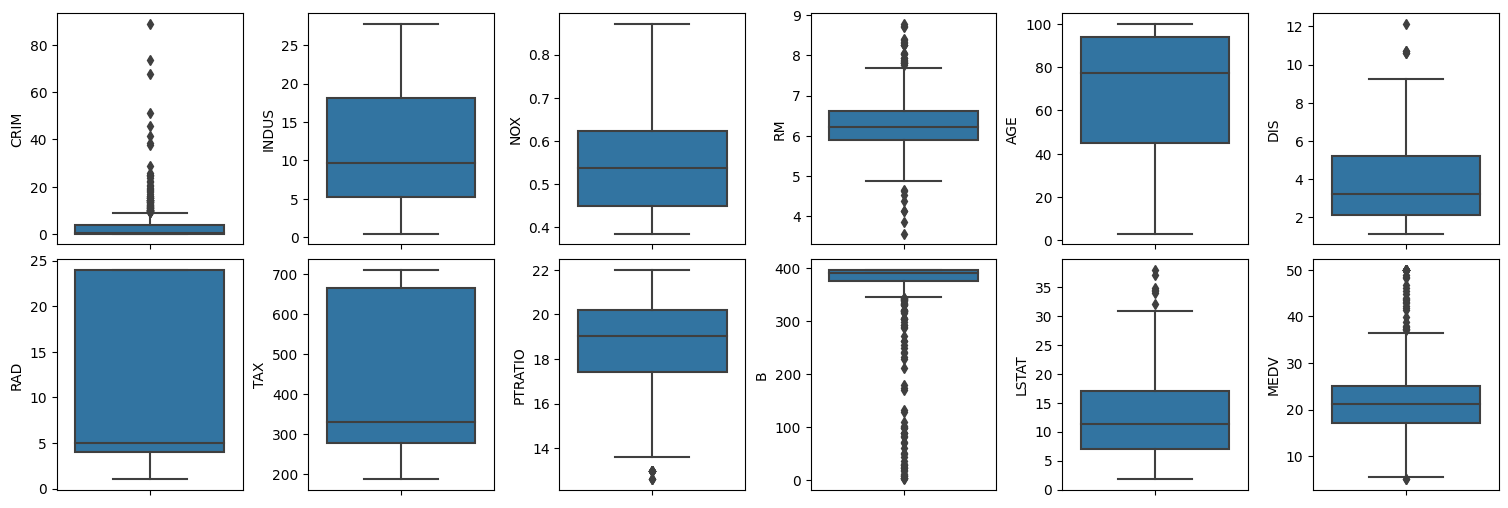

In [7]:
# Trazar gráficos de caja para ver si hay valores atípicos en nuestros datos (considerando los datos entre el percentil 25 y el 75 como no atípicos).
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in dataset.columns:
  sns.boxplot(y=i, data=dataset, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

Las columnas CRIM, RM, DIS, PTRATIO, B, LSTAT y MEDV tienen valores atípicos.

In [8]:
# comprobación del porcentaje/cantidad de valores atípicos
for i in dataset.columns:

  # Ordenar el conjunto de datos por la columna actual de forma ascendente
  dataset.sort_values(by=i, ascending=True, na_position='last')

  # Calcular los cuartiles Q1 y Q3
  q1, q3 = np.nanpercentile(dataset[i], [25,75])


  # Calcular el rango intercuartílico (IQR)
  iqr = q3-q1


  # Calcular los límites inferior y superior para identificar valores atípicos
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)



  # Seleccionar los datos atípicos de la columna actual
  outlier_data = dataset[i][(dataset[i] < lower_bound) | (dataset[i] > upper_bound)] #creación de una serie de datos atípicos

  # Calcular el porcentaje de valores atípicos en la columna actual
  perc = (outlier_data.count()/dataset[i].count())*100
  print('Outliers en %s es %.2f%% con la cantidad de %.f' %(i, perc, outlier_data.count()))

  #----------------------el código siguiente es para las próximas secciones----------------------
  if i == 'B':
    outlierDataB_index = outlier_data.index
    outlierDataB_LB = dataset[i][(dataset[i] < lower_bound)]
    outlierDataB_UB = dataset[i][(dataset[i] > upper_bound)]
  elif i == 'CRIM':
    outlierDataCRIM_index = outlier_data.index
    outlierDataCRIM_LB = dataset[i][(dataset[i] < lower_bound)]
    outlierDataCRIM_UB = dataset[i][(dataset[i] > upper_bound)]
  elif i == 'MEDV':
    lowerBoundMEDV = lower_bound
    upperBoundMEDV = upper_bound



Outliers en CRIM es 13.04% con la cantidad de 66
Outliers en INDUS es 0.00% con la cantidad de 0
Outliers en NOX es 0.00% con la cantidad de 0
Outliers en RM es 5.93% con la cantidad de 30
Outliers en AGE es 0.00% con la cantidad de 0
Outliers en DIS es 0.99% con la cantidad de 5
Outliers en RAD es 0.00% con la cantidad de 0
Outliers en TAX es 0.00% con la cantidad de 0
Outliers en PTRATIO es 2.96% con la cantidad de 15
Outliers en B es 15.22% con la cantidad de 77
Outliers en LSTAT es 1.38% con la cantidad de 7
Outliers en MEDV es 7.91% con la cantidad de 40


Las variables 'CRIM' y 'B' tienen un alto porcentaje de datos atípicos que pueden afectar negativamente a la precisión de nuestro modelo.

Para deshacernos de esto podemos eliminar las observaciones o sustituirlas por algún método como la media o la mediana. Pero eliminar todas las observaciones atípicas no es una buena idea, ya que nos quedaremos con muy pocas observaciones debido a un mayor porcentaje de datos atípicos con los que entrenar nuestro modelo. Además, si sustituimos un porcentaje tan elevado de datos atípicos por algún enfoque (media, mediana, etc.), el resultado podría ser un modelo menos preciso o sesgado.

Podemos utilizar una alternativa: eliminemos los valores atípicos extremos y sustituyamos los restantes por algún enfoque (media, mediana, etc.).


In [9]:
dataset2 = dataset.copy() # Copiar los datos en otra variable sólo para facilitar la codificación, pero esto no es necesario

In [141]:
# eliminar los valores extremos de B y CRIM (eliminar esas observaciones)
removed=[]
outlierDataB_LB.sort_values(ascending=True, inplace=True)
outlierDataB_UB.sort_values(ascending=False, inplace=True)
counter=1
for i in outlierDataB_LB.index:
  if counter<=19:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataB_UB.index:
  if counter<=38:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataB_LB.index:
  if counter<=38 and i not in removed:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)


outlierDataCRIM_LB.sort_values(ascending=True, inplace=True)
outlierDataCRIM_UB.sort_values(ascending=False, inplace=True)
counter=1
for i in outlierDataCRIM_LB.index:
  if counter<=16 and i not in removed:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataCRIM_UB.index:
  if counter<=33 and i not in removed:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataCRIM_LB.index:
  if counter<=33 and i not in removed:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)

dataset2.shape

(435, 12)

Hemos eliminado 71 observaciones de nuestro conjunto de datos, ahora nos quedan 435 observaciones y 12 columnas.

**Ahora reemplazamos los valores atípicos restantes por la media de cada variable.**

In [10]:
dataset3 = dataset2.copy()

In [143]:
# sustitución de los valores atípicos restantes por la media
for i in dataset.columns:
  dataset.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(dataset[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  mean = dataset3[i].mean()
  if i != 'MEDV':
    dataset3.loc[dataset3[i] < lower_bound, [i]] = mean
    dataset3.loc[dataset3[i] > upper_bound, [i]] = mean
  else:
    dataset3.loc[dataset3[i] < lower_bound, [i]] = mean
    dataset3.loc[dataset3[i] > upper_bound, [i]] = 50

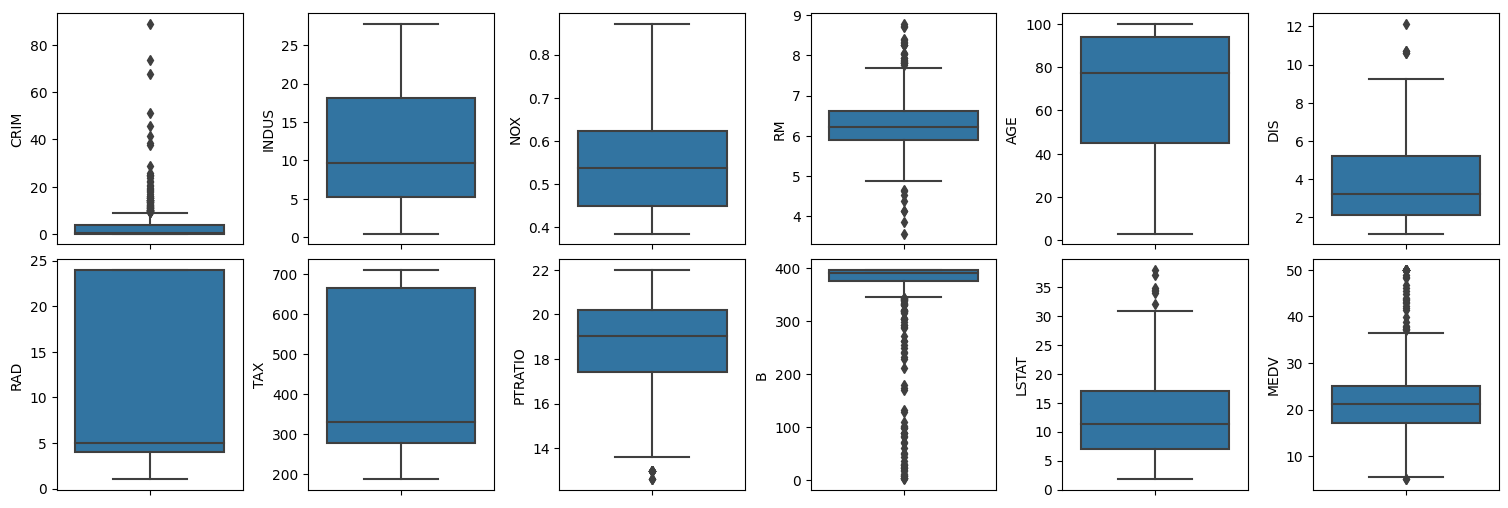

In [11]:
# Trazar gráficos de caja para ver si hay valores atípicos en nuestros datos (considerando los datos entre el percentil 25 y el 75 como no atípicos).
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in dataset.columns:
  sns.boxplot(y=i, data=dataset3, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

A continuación se describe nuestro conjunto de datos después de tratar los valores atípicos:

In [145]:
dataset3.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,1.054293,10.008575,0.534257,6.266477,64.741609,4.038049,7.409195,369.232184,18.402521,388.243160,11.128671,24.502299
std,1.936962,6.741091,0.108957,0.511640,28.319794,1.960932,7.185681,146.359443,1.945860,10.759893,5.973657,9.616602
min,0.006320,0.460000,0.385000,4.903000,2.900000,1.129600,1.000000,187.000000,13.600000,344.910000,1.730000,6.300000
25%,0.068740,4.860000,0.445000,5.926500,40.050000,2.404500,4.000000,276.000000,17.400000,382.557563,6.545000,18.900000
50%,0.173310,8.140000,0.515000,6.230000,70.200000,3.665000,5.000000,307.000000,18.600000,392.520000,9.970000,22.200000
75%,0.846290,18.100000,0.585000,6.550500,91.550000,5.400900,6.000000,403.000000,20.200000,396.260000,14.655000,27.100000
max,8.982960,27.740000,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,22.000000,396.900000,30.810000,50.000000


# Análisis de datos

Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn con las siguientes variables objetivos:

* DIS: distancias ponderadas a cinco centros de empleo de Boston
* INDUS: proporción de acres de negocios no minoristas por ciudad
* CRIM: tasa de delincuencia per cápita por ciudad
* RM: número promedio de habitaciones por vivienda
* MEDV: valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)

## Análisis visual

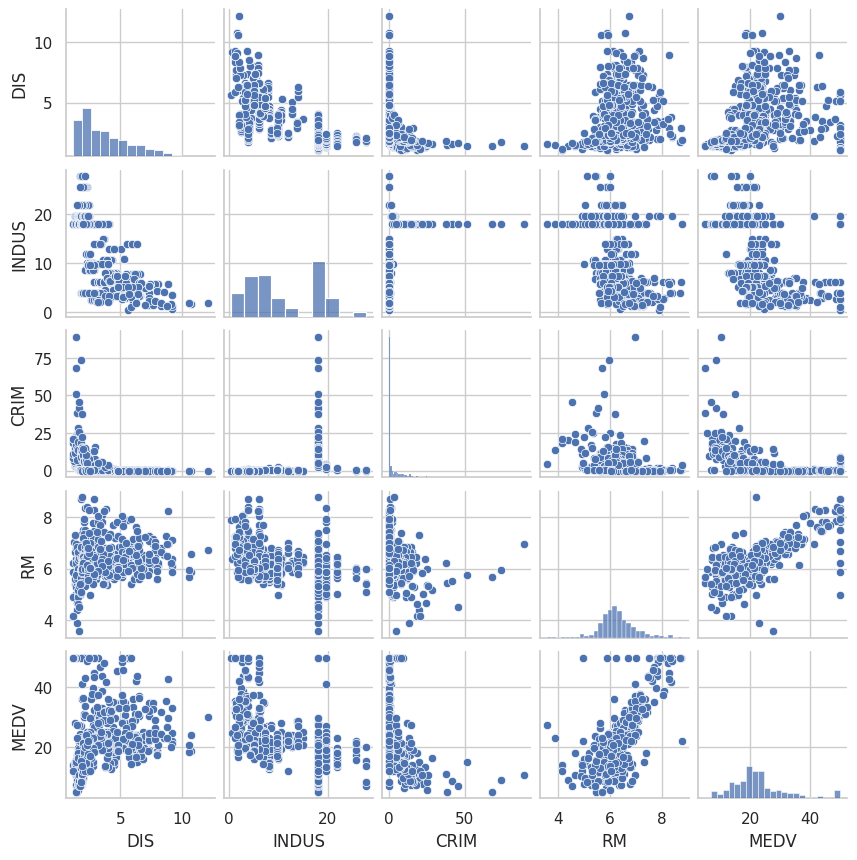

In [12]:

# Configuramos la apariencia de los graficos
sns.set(style='whitegrid', context='notebook')

# Seleccionamos los features que mas nos interesa para ver la correlacion entre las variables
cols = ["DIS", "INDUS", "CRIM", "RM","MEDV"]

# Graficamos con un pairplot las variables de interes para ver sus relaciones
sns.pairplot(dataset3[cols], height=1.75);

Al observar la distribución de la variable **MEDV**, podemos ver que se asemeja a una **distribución normal** con algunos valores atípicos. Esto es importante porque **MEDV es la variable objetivo que se desea predecir**. Si la variable objetivo sigue una distribución normal, es más fácil y preciso construir un modelo que pueda predecir su valor.

Además, la variable **RM** también muestra un similitud a una distribución normal. En este caso, se puede observar una **tendencia lineal positiva entre RM y MEDV**, lo que **sugiere que a medida que aumenta el valor de RM, también aumenta el valor de MEDV**. Por lo tanto, se podría utilizar esta relación para construir un **modelo de regresión lineal** que prediga el valor de MEDV en función de RM.

# Análisis numérico

Al realizar un **análisis visual** de un conjunto de datos, se obtienen ideas generales de las relaciones entre las variables y patrones. Sin embargo, **es importante complementarlo con un análisis numérico para confirmar que nuestras suposiciones** para confirmar si son correctas.

**El análisis numérico** puede incluir el cálculo de medidas estadísticas como la **media, la mediana y la desviación estándar**, así como la realización de pruebas de hipótesis y la evaluación de correlaciones entre variables.

En este caso, **se observa una relación aparentemente lineal**, por lo cual **es necesario calcular la correlación numérica para determinar si es significativa y cuánto es su fuerza**. Asimismo, **en cuanto a los valores atípicos**, es necesario analizar numéricamente su **impacto en las medidas estadísticas** y determinar si deben ser **excluidos** o si representan información importante.

<Axes: >

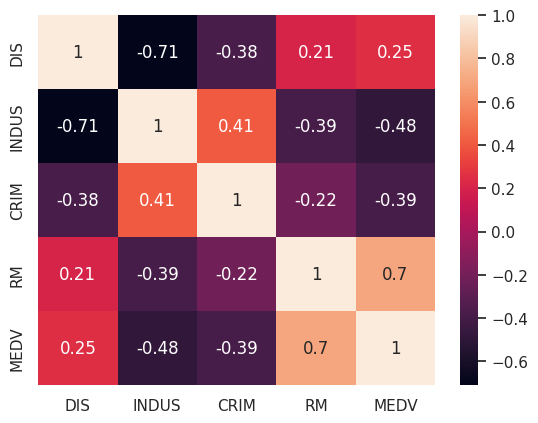

In [13]:
sns.heatmap(
    data=dataset3[cols].corr(),
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

* En particular, se observó que la correlación entre las variables RM y MEDV es positiva y relativamente alta en comparación con las demás variables. Esto significa que **a medida que aumenta el número promedio de habitaciones por vivienda (RM), también tiende a aumentar el valor mediano de las viviendas ocupadas por sus propietarios (MEDV)**.

* La correlación entre INDUS y DIS es negativa, es decir, esto podría indicar que **a medida que una ciudad tiene una mayor cantidad de negocios no minoristas, es más probable que se encuentre cerca de los centros de empleo de Boston**.

* la correlación entre valor mediano de las viviendas ocupadas por sus propietarios (MEDV) y la proporción de acres de negocios no minoristas por ciudad (INDUS) es de -0.48. Esta correlación negativa sugiere que **a medida que aumenta la proporción de acres de negocios no minoristas por ciudad (INDUS), el valor mediano de viviendas ocupadas por el propietario (MEDV) tiende a disminuir**.

## Selección de las características que mejor pueden predecir el MEDV

**Utilización de p-Value para seleccionar las características óptimas:**


Eliminación de todas las variables cuyo valor p es inferior al nivel de significación de 0,05 mediante el método de eliminación hacia atrás.

El valor p es una medida que ayuda a determinar la significación estadística de una característica en el modelo. En el contexto de regresión, el valor p se asocia comúnmente con la hipótesis nula de que la característica no tiene un efecto significativo sobre la variable de respuesta. Un valor p pequeño sugiere que la característica es estadísticamente significativa

In [146]:
# variable independiente (X) y variable dependiente (Y)
X = dataset3.iloc[:, :-1]
Y = dataset3.iloc[:, 11]
print(X)
print(Y)

        CRIM  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  \
0    0.00632   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.90   
1    0.02731   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.90   
2    0.02729   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8  392.83   
3    0.03237   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7  394.63   
4    0.06905   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7  396.90   
..       ...    ...    ...    ...   ...     ...  ...    ...      ...     ...   
501  0.06263  11.93  0.573  6.593  69.1  2.4786  1.0  273.0     21.0  391.99   
502  0.04527  11.93  0.573  6.120  76.7  2.2875  1.0  273.0     21.0  396.90   
503  0.06076  11.93  0.573  6.976  91.0  2.1675  1.0  273.0     21.0  396.90   
504  0.10959  11.93  0.573  6.794  89.3  2.3889  1.0  273.0     21.0  393.45   
505  0.04741  11.93  0.573  6.030  80.8  2.5050  1.0  273.0     21.0  396.90   

     LSTAT  
0     4.98  
1     9.14  


**Eliminación hacia Atrás:**

La eliminación hacia atrás es una estrategia de selección de características que comienza con todas las características disponibles en el modelo y luego elimina iterativamente aquellas que no contribuyen significativamente al rendimiento del modelo.

In [147]:
#Selección de características mediante P-value/eliminación hacia atrás
def BackwardElimination(sl, w):
    for i in range(0, len(w.columns)):
        regressor_OLS = sm.OLS(endog=Y, exog=w).fit()
        max_pvalue = max(regressor_OLS.pvalues)
        pvalues = regressor_OLS.pvalues
        if max_pvalue > SL:
            index_max_pvalue = pvalues[pvalues==max_pvalue].index
            w = w.drop(index_max_pvalue, axis = 1) #suprimir la variable para ese valor p
    return w,pvalues,index_max_pvalue

SL = 0.05
ones = np.ones((435,1))  #adding a columns of ones to X as it is required by statsmodels library
W = X
W.insert(0, 'Constant', ones, True)
W_optimal = W.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]]

W_optimal,pvalues,index_max_pvalue = BackwardElimination(SL, W_optimal)
X = W_optimal.drop('Constant', axis=1)

In [148]:
#remaning variabls after backward elimination
X.columns

Index(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

**Utilizar la correlación de Pearson para eliminar cualquier variable independiente altamente correlacionada y evitar la multicolinealidad. :**

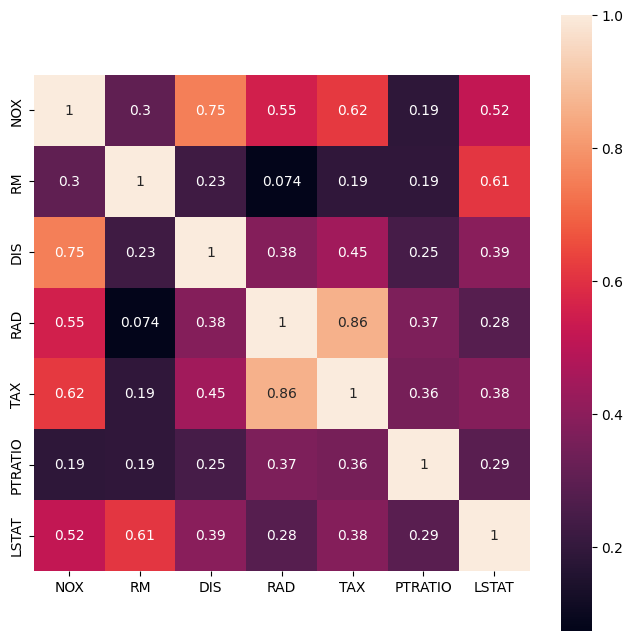

In [149]:
#Ploting heatmap using pearson correlation among independent variables
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(method='pearson').abs(), annot=True, square=True)
plt.show()

**Correlación Alta:** La multicolinealidad se manifiesta cuando hay una alta correlación entre las variables predictoras. Esto puede ser evidente a través del cálculo del coeficiente de correlación entre pares de variables.

**Problema de Identificación de Efectos Individuales:** Cuando hay multicolinealidad, puede volverse difícil o incluso imposible identificar el efecto individual de cada variable sobre la variable dependiente.

**Inestabilidad en los Coeficientes:** Pequeños cambios en los datos de entrada pueden resultar en grandes cambios en los coeficientes estimados. Esto hace que los resultados sean menos confiables y más sensibles a perturbaciones en los datos.

Del mapa de correlación anterior podemos ver que:
1.   TAX y RAD están altamente correlacionados con una puntuación de 0.86. En mi opinión, RAD (índice de accesibilidad a las autopistas radiales) será más importante para predecir el MEDV que TAX (tipo del impuesto sobre bienes inmuebles por cada $10,000 ), por lo que se elimina TAX.
2.   DIS y NOX están altamente correlacionados con una puntuación de 0.75. En mi opinión, DIS (distancias ponderadas a cinco centros de empleo de Boston) será más importante para predecir el MEDV que NOX (concentración de óxidos nítricos (partes por 10 millones)), por lo que se elimina NOX.







In [150]:
#dropping TAX and NOX
X.drop('TAX', axis=1, inplace=True)
X.drop('NOX', axis=1, inplace=True)

#columnas restantes tras eliminar la multicolinealidad
X.columns

Index(['RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

Del proceso de selección de características anterior concluimos que las características *RM*, *DIS*, *RAD*, *PTRATIO* y *LSAT* pueden por sí solas predecir mejor el MEDV.

# **Machine learning**

Se trata de un problema de regresión, ya que tenemos que predecir un valor continuo (no categórico).

Implementación de modelos de aprendizaje automático de regresión en nuestro conjunto de datos (utilizando las variables independientes restantes) para predecir el MEDV

In [151]:
#spliting data into traning set and test set
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2, random_state=0)

In [152]:
X_train

,RM,DIS,RAD,PTRATIO,LSTAT
4,7.147000,6.0622,3.0,18.70000,5.33
236,6.631000,4.1480,8.0,17.40000,9.54
224,6.350715,2.8944,8.0,17.40000,4.14
448,6.185000,2.2616,24.0,20.20000,18.13
337,5.895000,5.6150,5.0,20.20000,10.56
...,...,...,...,...,...
328,5.868000,5.2146,4.0,16.90000,9.97
197,7.107000,7.3090,2.0,18.21977,8.61
118,5.872000,2.4775,6.0,17.80000,15.37
47,6.030000,5.6894,3.0,17.90000,18.80


In [153]:
Y_test

158    24.3
269    20.7
54     18.9
360    25.0
499    17.5
       ... 
52     25.0
74     24.1
26     16.6
45     19.3
277    33.1
Name: MEDV, Length: 87, dtype: float64

**Linear regression model:**

In [154]:
linear = lr()
linear.fit(X_train, Y_train)
Y_pred = linear.predict(X_test)
Y_compare_linear = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_linear.head() #visualización de la comparación entre los valores reales y previstos del MEDV

,Actual,Predicted
158,24.3,34.939650
269,20.7,20.790437
54,18.9,12.820017
360,25.0,28.018050
499,17.5,18.986167


**Support vector regression model:**

In [155]:
svr = SVR(kernel= 'poly', gamma='scale')
svr.fit(X_train,Y_train)
Y_pred = svr.predict(X_test)
Y_compare_svr = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_svr.head() #visualización de la comparación entre los valores reales y previstos del MEDV

,Actual,Predicted
158,24.3,28.650278
269,20.7,20.239507
54,18.9,13.128499
360,25.0,28.952940
499,17.5,19.320055


**Decission tree regression model:**

In [156]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
Y_compare_randomforrest = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_randomforrest.head() #visualización de la comparación entre los valores reales y previstos del MEDV

,Actual,Predicted
158,24.3,30.927
269,20.7,21.811
54,18.9,17.560
360,25.0,27.961
499,17.5,20.566


**K-Nearest Neighbour regression model:**

In [157]:
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_knn.head() #visualización de la comparación entre los valores reales y previstos del MEDV

,Actual,Predicted
158,24.3,36.107692
269,20.7,21.061538
54,18.9,18.330769
360,25.0,27.530769
499,17.5,19.900000


**Comparación de los valores reales y previstos del MEDV obtenidos mediante distintos modelos de aprendizaje automático.**

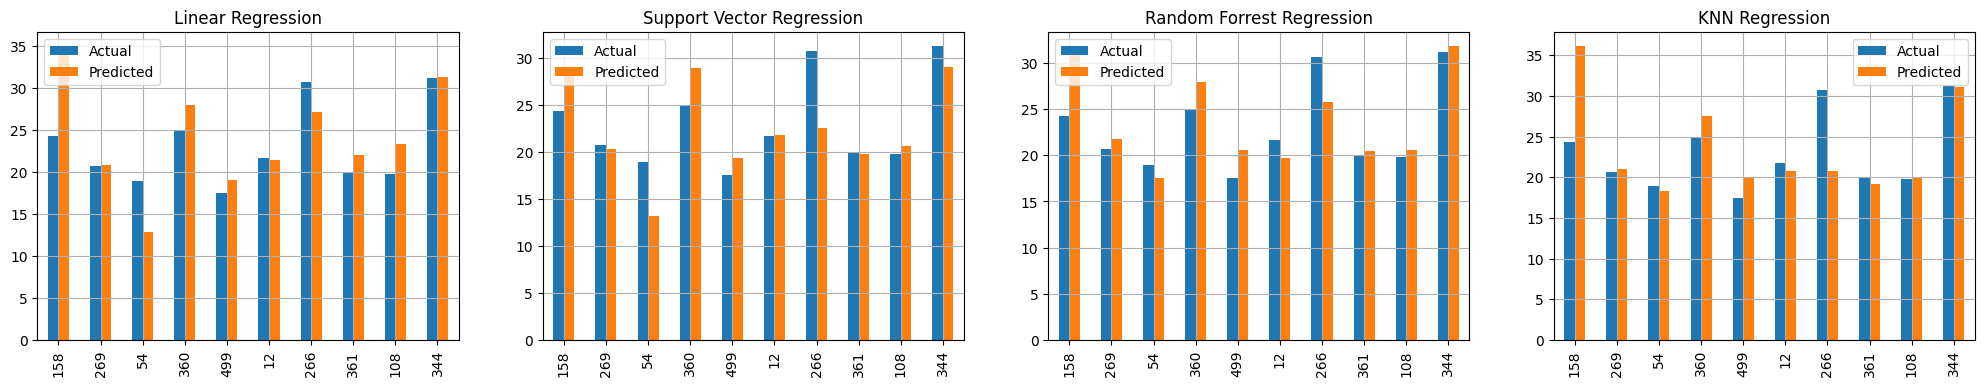

In [158]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(25, 4))
ax = ax.flatten()
Y_compare_linear.head(10).plot(kind='bar', title='Linear Regression', grid=True, ax=ax[0])
#Y_compare_poly.head(10).plot(kind='bar', title='Polynomial Regression', grid=True, ax=ax[1])
Y_compare_svr.head(10).plot(kind='bar', title='Support Vector Regression', grid=True, ax=ax[1])
Y_compare_randomforrest.head(10).plot(kind='bar', title='Random Forrest Regression', grid=True, ax=ax[2])
Y_compare_knn.head(10).plot(kind='bar', title='KNN Regression', grid=True, ax=ax[3])
plt.show()

**Puntuaciones (R al cuadrado) de distintos modelos de aprendizaje automático mediante validación cruzada K-fold**

In [159]:
print('Según el método R2, hemos obtenido las siguientes puntuaciones para nuestros modelos de aprendizaje automático:')
modelNames = ['Linear', 'Support Vector', 'Random Forrest', 'K-Nearest Neighbour']
modelRegressors = [linear, svr, rf, knn]
models = pd.DataFrame({'modelNames' : modelNames, 'modelRegressors' : modelRegressors})
counter=0
score=[]
for i in models['modelRegressors']:

    accuracy = cvs(i, X_train, Y_train, scoring='r2', cv=5)
    print('Exactitud de %s Regression model es %.2f' %(models.iloc[counter,0],accuracy.mean()))
    score.append(accuracy.mean())
    counter+=1

Según el método R2, hemos obtenido las siguientes puntuaciones para nuestros modelos de aprendizaje automático:
Exactitud de Linear Regression model es 0.54
Exactitud de Support Vector Regression model es 0.49
Exactitud de Random Forrest Regression model es 0.74
Exactitud de K-Nearest Neighbour Regression model es 0.60


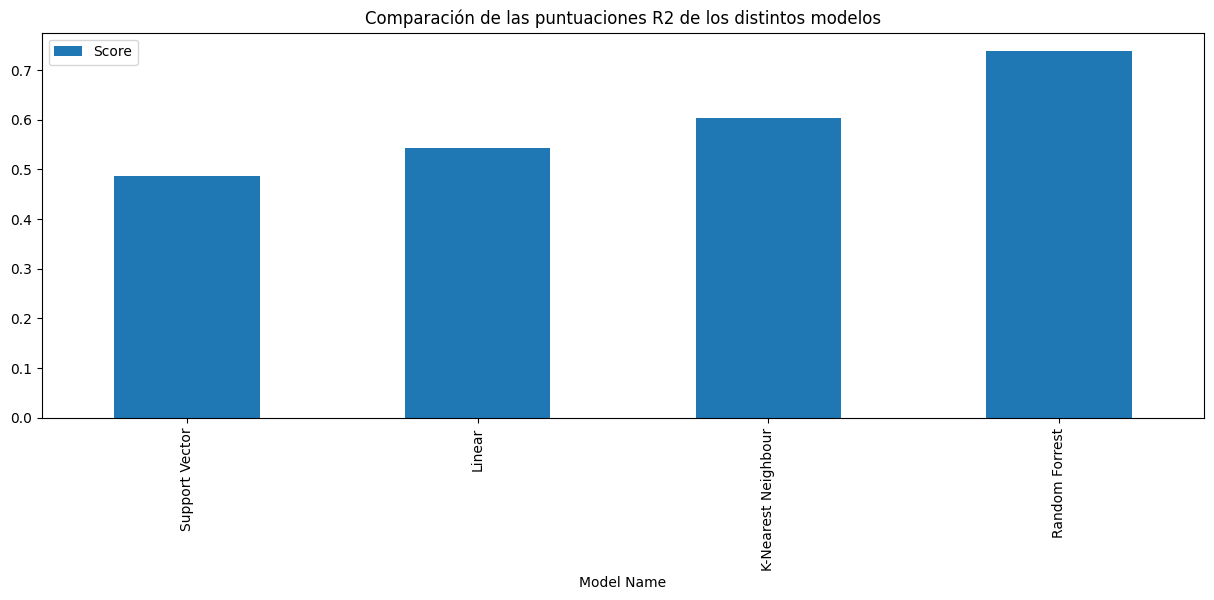

In [160]:
pd.DataFrame({'Model Name' : modelNames,'Score' : score}).sort_values(by='Score', ascending=True).plot(x=0, y=1, kind='bar', figsize=(15,5), title='Comparación de las puntuaciones R2 de los distintos modelos', )
plt.show()

De la visualización anterior podemos resumir que el modelo de aprendizaje automático Random Forrest (r2 = 0.73) proporciona la mejor puntuación y podemos utilizarlo para predecir los valores de MEDV.

Sin embargo, otros modelos como el modelo de regresión KNN (r2 = 0.60) también tiene una puntuación comparable a la de Random Forrest y, por lo tanto, también pueden utilizarse para realizar predicciones del MEDV.



# **Resumen final**

**De las anteriores técnicas de ingeniería de datos y aprendizaje automático podemos concluir que:**

1.   Las características RM, DIS, RAD, PTRATIO y LSAT son capaces por sí solas de predecir el MEDV con una buena precisión.
2.   El modelo de regresión de Forrest aleatorio (con 100 estimadores) puede considerarse un buen modelo para predecir el MEDV utilizando las tres características mencionadas.
3.   No obstante, el modelo de regresión KNN también pueden utilizarse como alternativa a Random Forrest.
4.   Los modelos de regresión lineal y de vectores de apoyo muestran la menor puntuación r2, por lo que pueden considerarse malos modelos para predecir el MEDV.

Ninguna técnica de Ciencia de Datos es perfecta y siempre hay margen de mejora.